![BTS](img/Logo-BTS.jpg)

# Session 9: Probability

### Juan Luis Cano Rodríguez <juan.cano@bts.tech> - Data Science Foundations (2018-11-06)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Juanlu001/bts-mbds-data-science-foundations/blob/master/sessions/09-Probability.ipynb)

## Exercise 1: The birthday paradox

1. Compute the probability of 1 person **not** sharing the birthday with 1 other person
2. If there is a room with 3 people, what's the probability that **none** of them share the birthday?
3. What number of people do you need to be 100 % sure that there will be at least one birthday coincidence? (Pigeonhole principle)
4. Create a function `generate_birthdays` that generates $n$ random integers from 1 to 365, where $n$ is an integer parameter to the function
5. Create a function `run_experiment` that takes $n$, runs `generate_birthdays(n)`, and returns `True` if there is a birthday coincidence (and `False` otherwise)
6. Execute `run_experiment` 200 times with `n=19` and plot the evolution of the number of successful experiments divided by total number of experiments, like this (scale removed):

![Evolution](img/evolution.png)

7. Wrap this code in a function `run_simulation` that takes `num_times` and `n` as parameters, and returns a pandas `Series` with the numerical results shown above
8. Call `run_simulation` with `num_times=10_000` changing `n` and take only the last value. When do you achieve 50 % probability?
9. Plot the evolution of the probability in terms of `n`, using a fixed `num_times=10_000`, like this (scale removed):

![Birthday coincidence probability](img/birthday-prob.png)

In [1]:
import random

In [21]:
random.randint(1, 365)

92

In [25]:
import numpy as np

In [27]:
np.random.randint?

In [33]:
np.random.randint(1, 366, 10)

array([179, 247, 360, 264, 128, 134, 316, 281, 141, 273])

In [37]:
def generate_birthdays_long(n):
    birthdays = []
    for ii in range(n):
        birthdays.append(random.randint(1, 365))
    return birthdays

In [38]:
def generate_birthdays_compr(n):
    return [random.randint(1, 365) for ii in range(n)]

In [39]:
def generate_birthdays_np(n):
    return np.random.randint(1, 366, n).tolist()

In [40]:
%timeit generate_birthdays_long(10_000)

18 ms ± 433 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [41]:
%timeit generate_birthdays_compr(10_000)

16.7 ms ± 129 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [45]:
%timeit generate_birthdays_np(10_000)

124 µs ± 804 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [24]:
generate_birthdays(10000000000000)

38

In [117]:
birthdays = generate_birthdays(19)
len(set(birthdays)) < len(birthdays)

True

In [98]:
def run_experiment(n):
    birthdays = generate_birthdays(n)
    return len(set(birthdays)) < len(birthdays)

In [110]:
run_experiment(19)

False

In [69]:
# Don't do this!
def run_experiment(n):
    birthdays = generate_birthdays(n)
    known_birthdays = []

    for birthday in birthdays:
        if birthday in known_birthdays:
            return True
        else:
            known_birthdays.append(birthday)

    return False

In [84]:
run_experiment(19)

False

In [47]:
# Don't do this!
def run_experiment(n):
    birthdays = generate_birthdays(n)
    for ii, number_ii in enumerate(birthdays):
        for jj, number_jj in enumerate(birthdays):
            if ii != jj and number_ii == number_jj:
                return True

    return False

In [67]:
run_experiment(19)

False

In [198]:
!pip install tqdm

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
import matplotlib.pyplot as plt
plt.ion()

In [127]:
import pandas as pd

In [146]:
results = []
for _ in range(200):
    results.append(run_experiment(19))

ser = pd.Series(results)

In [141]:
evolution = ser.cumsum() / (ser.index + 1)

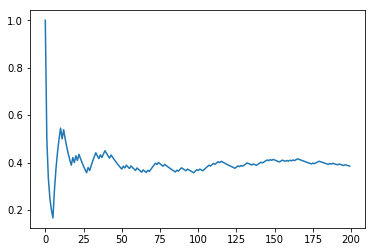

In [145]:
evolution.plot();

In [162]:
def prob(n):
    prob = 1.0
    for ii in range(1, n):
        prob *= (365 - ii) / 365

    return 1 - prob

In [188]:
1 - (364 / 365) * (363 / 365)

0.008204165884781345

In [190]:
prob(30)

0.7063162427192688

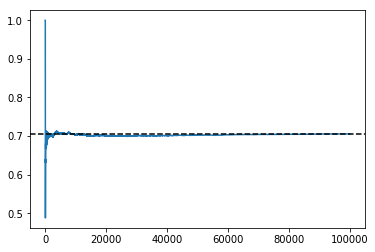

In [191]:
def run_simulation(num_times, n):
    results = []
    graph = []
    for _ in range(num_times):
        results.append(run_experiment(n))
        graph.append(results.count(True) / len(results))

    return pd.Series(graph)

graph = run_simulation(100_000, 30)

plt.plot(graph);
plt.axhline(prob(30), color='k', linestyle='--');

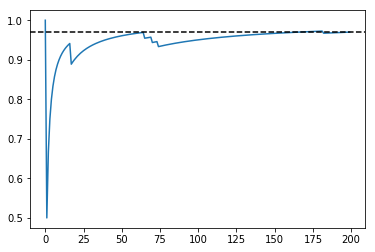

In [177]:
def run_simulation(num_times, n):
    results = []
    graph = []
    for _ in range(num_times):
        results.append(run_experiment(n))
        graph.append(results.count(True) / len(results))

    return pd.Series(graph)

graph = run_simulation(200, 50)

plt.plot(graph);
plt.axhline(prob(50), color='k', linestyle='--');

In [194]:
run_simulation(1_000, 19).iloc[-1]

0.401

In [199]:
from tqdm import tqdm_notebook

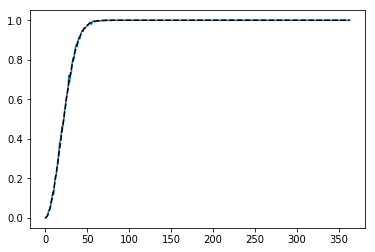

In [203]:
results = []
results_theoretical = []
for n in tqdm_notebook(range(1, 365)):
    results.append(run_simulation(1_000, n).iloc[-1])
    results_theoretical.append(prob(n))

plt.plot(results);
plt.plot(results_theoretical, 'k--');

In [205]:
import random

In [204]:
random.seed(42)

In [207]:
random.random()

0.6394267984578837

In [208]:
random.random()

0.025010755222666936

## Exercise 2a: Horse kicks

![Horse kicks](img/horse-kicks.png)

(from https://archive.org/stream/dasgesetzderklei00bortrich#page/n63/mode/2up)

1. Load `data/HorseKicks.csv` in pandas (obtained from https://web.archive.org/web/20160821150144/http://www.math.uah.edu/stat/data/HorseKicks.html)
2. Get the total number of deaths by year, and also the total number of deaths by corps
3. What's the average number of deaths per corps and year?
4. Get the frequency of each number of casualties by corps and year (e.g. how many 0s, 1s, 2s, 3s... are in the table)
5. Normalize the result by year and corps and plot it as a bar plot

In [209]:
import pandas as pd

In [210]:
data = pd.read_csv("data/HorseKicks.csv", index_col="Year")
data.head()

,GC,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C14,C15
Year,,,,,,,,,,,,,,
1875,0,0,0,0,0,0,0,1,1,0,0,0,1,0
1876,2,0,0,0,1,0,0,0,0,0,0,0,1,1
1877,2,0,0,0,0,0,1,1,0,0,1,0,2,0
1878,1,2,2,1,1,0,0,0,0,0,1,0,1,0
1879,0,0,0,1,1,2,2,0,1,0,0,2,1,0


In [211]:
data.sum()

GC     16
C1     16
C2     12
C3     12
C4      8
C5     11
C6     17
C7     12
C8      7
C9     13
C10    15
C11    25
C14    24
C15     8
dtype: int64

In [212]:
data.sum(axis=1)

Year
1875     3
1876     5
1877     7
1878     9
1879    10
1880    18
1881     6
1882    14
1883    11
1884     9
1885     5
1886    11
1887    15
1888     6
1889    11
1890    17
1891    12
1892    15
1893     8
1894     4
dtype: int64

In [219]:
data.mean(axis=1).head()

Year
1875    0.214286
1876    0.357143
1877    0.500000
1878    0.642857
1879    0.714286
dtype: float64

In [220]:
data.mean().head()

GC    0.8
C1    0.8
C2    0.6
C3    0.6
C4    0.4
dtype: float64

In [222]:
data.mean().mean()

0.7

In [224]:
data.stack()

Year     
1875  GC     0
      C1     0
      C2     0
      C3     0
      C4     0
      C5     0
      C6     0
      C7     1
      C8     1
      C9     0
      C10    0
      C11    0
      C14    1
      C15    0
1876  GC     2
      C1     0
      C2     0
      C3     0
      C4     1
      C5     0
      C6     0
      C7     0
      C8     0
      C9     0
      C10    0
      C11    0
      C14    1
      C15    1
1877  GC     2
      C1     0
            ..
1892  C14    1
      C15    0
1893  GC     0
      C1     1
      C2     0
      C3     0
      C4     0
      C5     1
      C6     0
      C7     2
      C8     0
      C9     0
      C10    1
      C11    3
      C14    0
      C15    0
1894  GC     1
      C1     0
      C2     0
      C3     0
      C4     0
      C5     0
      C6     0
      C7     0
      C8     1
      C9     0
      C10    1
      C11    1
      C14    0
      C15    0
Length: 280, dtype: int64

In [225]:
data.stack().value_counts()

0    144
1     91
2     32
3     11
4      2
dtype: int64

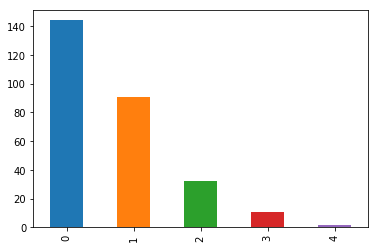

In [227]:
data.stack().value_counts().plot.bar()

## Exercise 2b: Poisson distribution

1. Create a Poisson distribution of $\mu = $ the average number of deaths per corps and year
2. Sample the probability mass function in the points 0, 1, 2, 3, 4
3. Create a dataframe with two columns: "real" with the normalized frequencies from exercise 1a, and "theoretical" with the values obtained in the previous question
4. Plot the result in a bar plot